In [14]:
import igraph as ig
import random as rd
import numpy as np
import matplotlib.pyplot as plt

font = {'family': 'serif',
        'color':  'black',
        'weight': 'normal',
        'size': 18,
        }
params = {'legend.fontsize': 16,
          'legend.handlelength': 2.}
plt.rcParams.update(params)

Each node can have three possible states: Susceptible (S), Infected (I), Recovered (R).  
_pop_ is the size of the network (population)  
_edge_per_node_ is the number of edges generated for each node  
_p_infect_ is the probability for an infected node to contaminate its susceptible neighbours  
_len_infect_ is the number of days an infected node remains contagious.

In [2]:
color_dict = {"S": "blue", "I": "red", "R": "green"}
pop = 100
edge_per_node = 2
p_infect = 0.15
infect_len = 5

In [4]:
g = ig.Graph.Barabasi(pop, edge_per_node,power=1)
print(len(g.es)) # Number of edges
g.vs["state"] = "S"
g.vs["duration"] = 0
cl_coeff = g.transitivity_undirected()
print(cl_coeff) # Clustering coefficient

197
0.04420432220039293


The model is initialised by infecting one random node (i). 

In [6]:
i = rd.randint(0, pop-1)
g.vs[i]["state"] = "I"
nb_S = [pop]
nb_I = [1]
nb_R = [0]
max_deg_I = [g.vs[i].degree()]
tot_deg_I = [g.vs[i].degree()]

At each time step:  
- The duration of infection is incremented for each infected node
- Each infected node can contamine its neighbours with probability _p_infect_
- When the duration of infection becomes equal to _infect_len_, the node becomes recovered (R)
- The maximum degree among infected nodes is recorded (_max_deg_I_)

https://www.newscientist.com/article/2238473-you-could-be-spreading-the-coronavirus-without-realising-youve-got-it/#ixzz6HjYOcZEu

- most people develop symptomps after about 5.1 (5) days
- infectiousness starts about 2.5 (3) days before the onset of symptoms and peaks 0.625 (1) days before
- once symptoms develop, a person's viral load declines steadily, and they become increasingly less infectious
- people carry the virus (can infect) typically from 2-14 days

In [8]:
# Time-dependent rate of infection
probs_inf = [0.01,0.01,0.1,0.2,0.3,0.3,0.3,0.25,0.2,0.15,0.1,0.05,0.01,0.01]
print(len(probs_inf))

14


In [9]:
time_1perc = [] #time when 1% of the population is infected
time_1hub = [] #time when the first hub is infected
deg_cutoff = 8
for time in range(120): #no. of days
    if len(g.vs.select(state_eq = "I"))> pop*0.01  and len(time_1perc) is 0:
        time_1perc.append(time)
    for n in g.vs.select(state_eq = "I"): #iterates through each node in the network
        if g.vs[n.index]["duration"] is 0 and len(g.neighbors(n)) > deg_cutoff and len(time_1hub) is 0:
            time_1hub.append(time)
        g.vs[n.index]["duration"] += 1 #from day 0 to infect_len this node continues to infect
        day_inf = g.vs[n.index]["duration"]
        for nb in g.neighbors(n): #iterates through neighbours of that node
            if g.vs[nb]["state"] == "S": #if node is infected...
                r = rd.random() #random state
                #if r < p_infect: #random state says to infect according to p_infect
                if r < probs_inf[day_inf]:
                    g.vs[nb]["state"] = "I" #change state to infected
        #if g.vs[n.index]["duration"] >= infect_len: #after infect_len that node changes to recovered
        if g.vs[n.index]["duration"] >= rd.randrange(1,14):
            g.vs[n.index]["state"] = "R"
    nb_S.append(len(g.vs.select(state_eq = "S"))) #no. of susceptibles in population
    nb_I.append(len(g.vs.select(state_eq = "I"))) #no. of infecteds in population
    nb_R.append(len(g.vs.select(state_eq = "R"))) #no. of recovereds in population
    if len(g.vs.select(state_eq = "I")) > 0: #if there are infecteds
        max_deg_I.append(max(g.vs.select(state_eq = "I").degree())) #records max no. of neighbours within infecteds
        tot_deg_I.append(sum(g.vs.select(state_eq = "I").degree())) #records total no. of neighbours within infecteds
    else:
        max_deg_I.append(0)
print(time_1perc)
print(time_1hub)

[]
[]


Repeating simulations several times we see that in many cases _max_deg_I_ increases shortly before _I_ takes off, then a large proportion of the network will be infected; but in some cases _I_ never takes off and falls to zero.

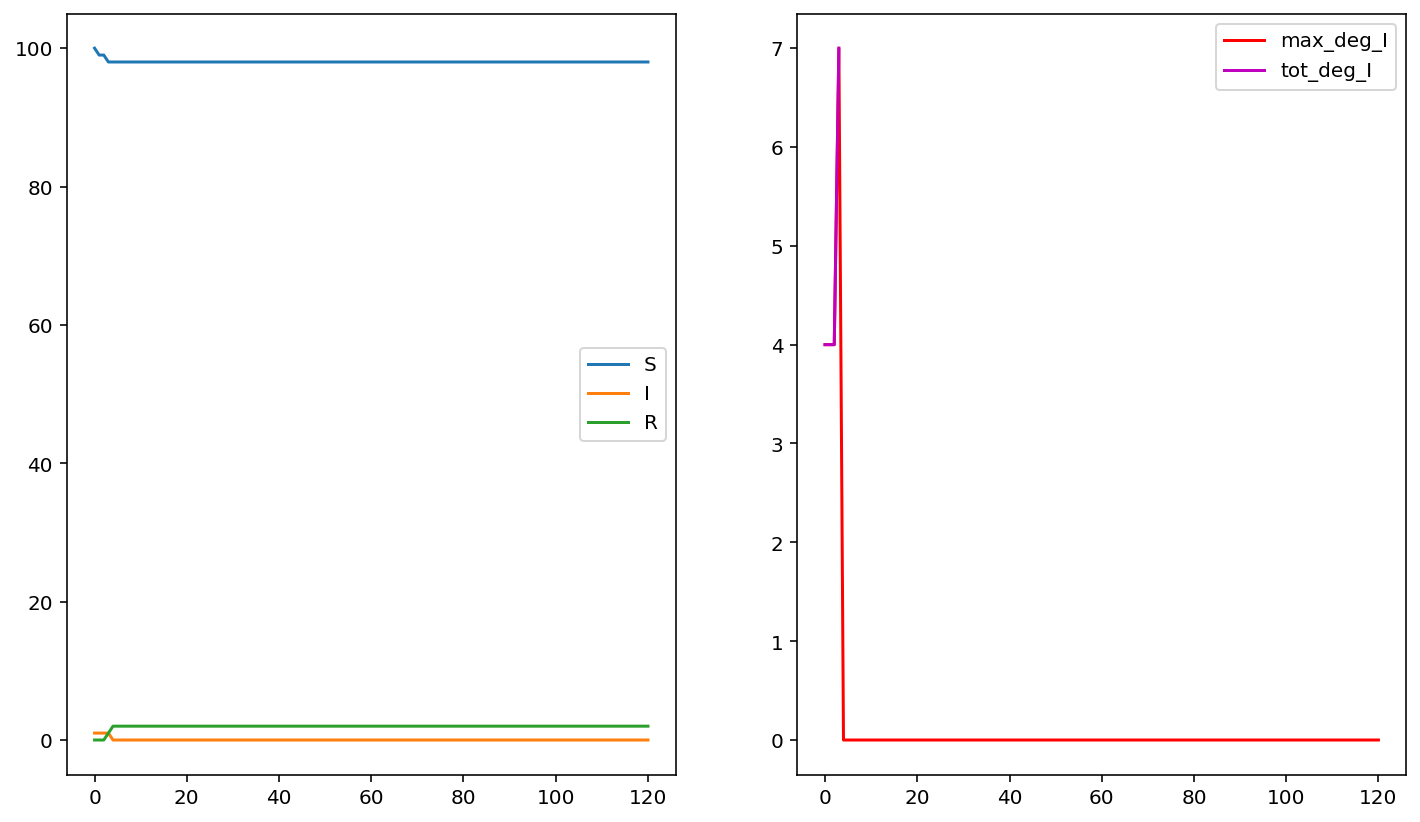

In [11]:
plt.subplot(1, 2, 1)
plt.plot(nb_S, label='S')
plt.plot(nb_I, label='I')
plt.plot(nb_R, label='R')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(max_deg_I, 'r-', label='max_deg_I')
plt.plot(tot_deg_I, 'm-', label='tot_deg_I')
plt.legend()

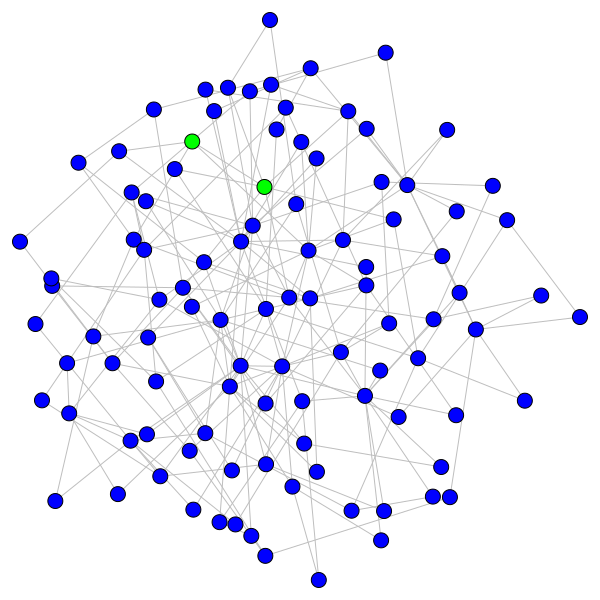

In [12]:
visual_style = {}
visual_style["vertex_size"] = 15
visual_style["vertex_color"] = [color_dict[state] for state in g.vs["state"]]
visual_style["edge_color"] = "gray"
ig.plot(g, **visual_style)

92.0 % of nodes have a degree of 8 or less.



NameError: name 'font' is not defined

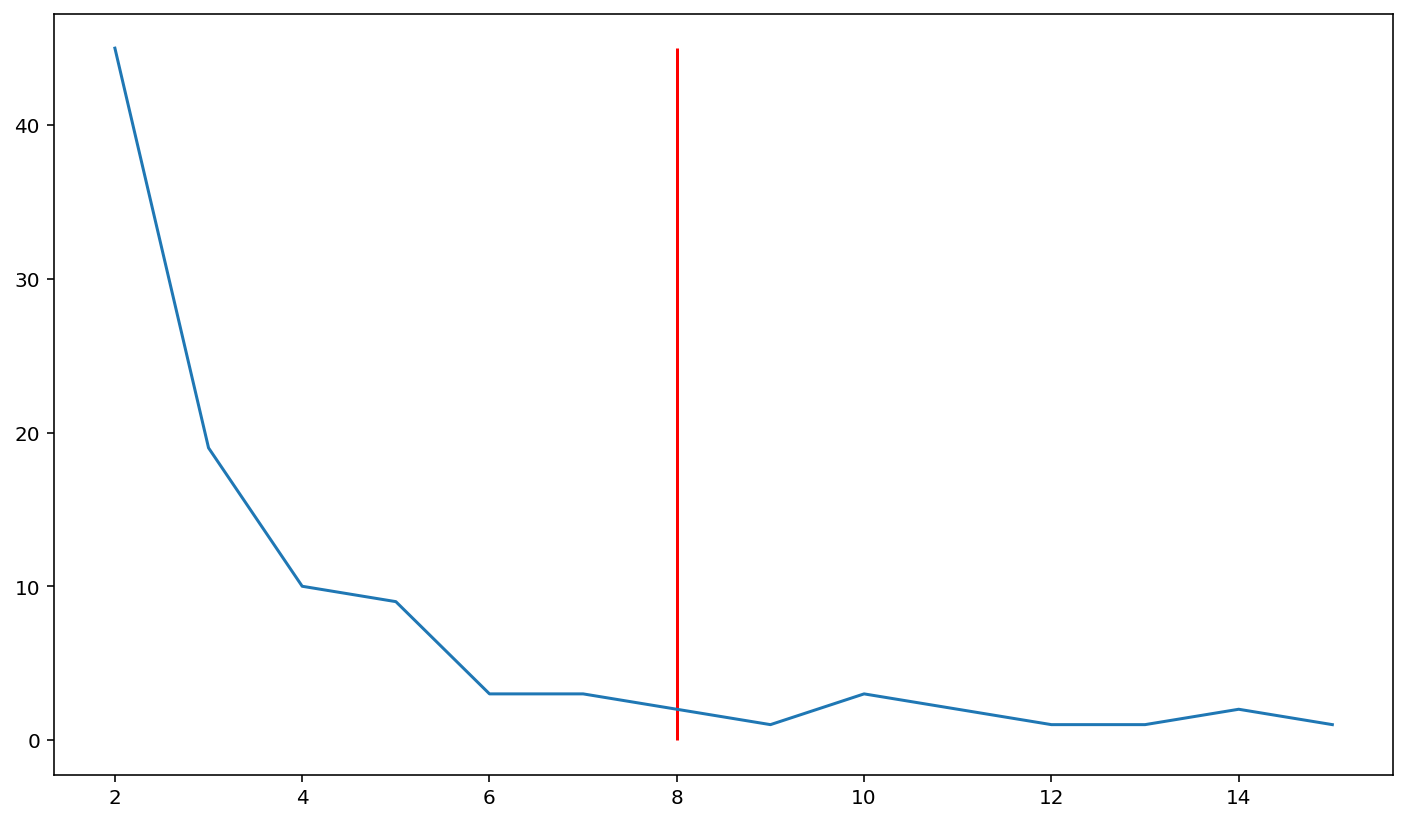

In [13]:
deg_val = sorted(set(g.vs.degree()))
deg_hist = [g.vs.degree().count(x) for x in deg_val]
plt.plot(deg_val,deg_hist)
perc = sum(deg_hist[:deg_cutoff])/sum(deg_hist)
print("{} % of nodes have a degree of {} or less.\n".format(round(perc*100,3),deg_cutoff))
plt.vlines(deg_cutoff,0,max(deg_hist),'r')
plt.xlabel("No. of Neighbours (Degree)",fontdict=font)
plt.tick_params(axis='x', labelsize=14)
plt.ylabel("No. of Nodes",fontdict=font)
plt.tick_params(axis='y', labelsize=14)